# Circuit basics

In [5]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator

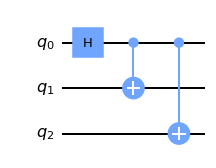

In [2]:
import numpy as np
import pylatexenc
from qiskit import QuantumCircuituit

circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0,2)
circ.draw('mpl')

In [14]:
circ = QuantumCircuit(3)
circ.draw()

q_0: 
     
q_1: 
     
q_2:

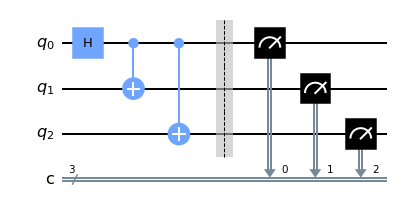

In [4]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

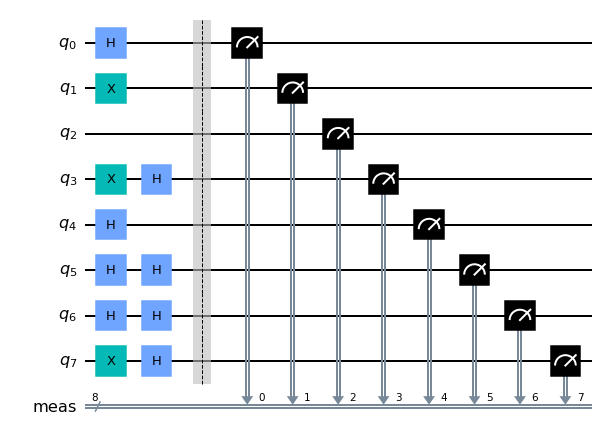

In [6]:
def bb84_circuit(state, basis, measurement_basis):
   
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)

       
    circuit.measure_all()
    
    return circuit

# 
num_qubits = 8

alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)

bb84_circuit(alice_basis, alice_state, bob_basis).draw('mpl')

# Structure of project
- Def do:
    - BB84
    - implement a terminal app... simple file i/o and interaciton w terminal
- If time:
    - pBFT and an example

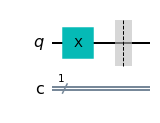

In [12]:
np.random.seed(seed=0)
n = 100
## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)
# print(alice_bits)



np.random.seed(seed=0)
n = 100
## Step 1
#Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
# print(alice_bases)




def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

message[5].draw('mpl')
# len(message)


In [3]:
import time

# Print iterations progress
# https://stackoverflow.com/questions/3173320/text-progress-bar-in-terminal-with-block-characters
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
        
# A List of Items
items = list(range(0, 57))
l = len(items)

# Initial call to print 0% progress
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
for i, item in enumerate(items):
    # Do stuff...
    time.sleep(0.1)
    # Update Progress Bar
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
